In [1]:
import pickle

with open('covtype3.pickle', 'rb') as f:
    covtype = pickle.load(f)

## problem 2.1
The default criterion used to measure the quality of a split is Gini impurity.

The default stopping criterion used by the learning algorithm is that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. The default value of min_samples_split is 2.

To ensure that the learned decision tree does not have more than 20 leaf nodes, we change the call as follows

In [8]:
# problem 2.1
from sklearn import tree

my_tree = tree.DecisionTreeClassifier(random_state=0)
#my_tree = tree.DecisionTreeClassifier(random_state=0, max_leaf_nodes=20)
my_tree.fit(covtype['train_data'], covtype['train_labels'])

DecisionTreeClassifier(random_state=0)

## problem 2.2

The training error rate of the learned decision tree my_tree is 0. And the test error rate of the learned decision tree my_tree is 0.22.

In [9]:
# problem 2.2 train error rate and test error rate
from sklearn.metrics import classification_report

print('Performance on training data')
print(classification_report(covtype['train_labels'],
    my_tree.predict(covtype['train_data']),
    target_names=covtype['class_names']))

print('Performance on test data')

print(classification_report(covtype['test_labels'],
    my_tree.predict(covtype['test_data']),
    target_names=covtype['class_names']))

Performance on training data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    164652
           2       1.00      1.00      1.00    218031
           3       1.00      1.00      1.00     33493
           4       1.00      1.00      1.00      8974
           5       1.00      1.00      1.00     13981
           6       1.00      1.00      1.00     19810
           7       1.00      1.00      1.00     22071

    accuracy                           1.00    481012
   macro avg       1.00      1.00      1.00    481012
weighted avg       1.00      1.00      1.00    481012

Performance on test data
              precision    recall  f1-score   support

           1       0.84      0.82      0.83     34044
           2       0.85      0.85      0.85     45223
           3       0.67      0.68      0.68      7023
           4       0.16      0.18      0.17      1867
           5       0.37      0.40      0.38      2935
           6       0.51 

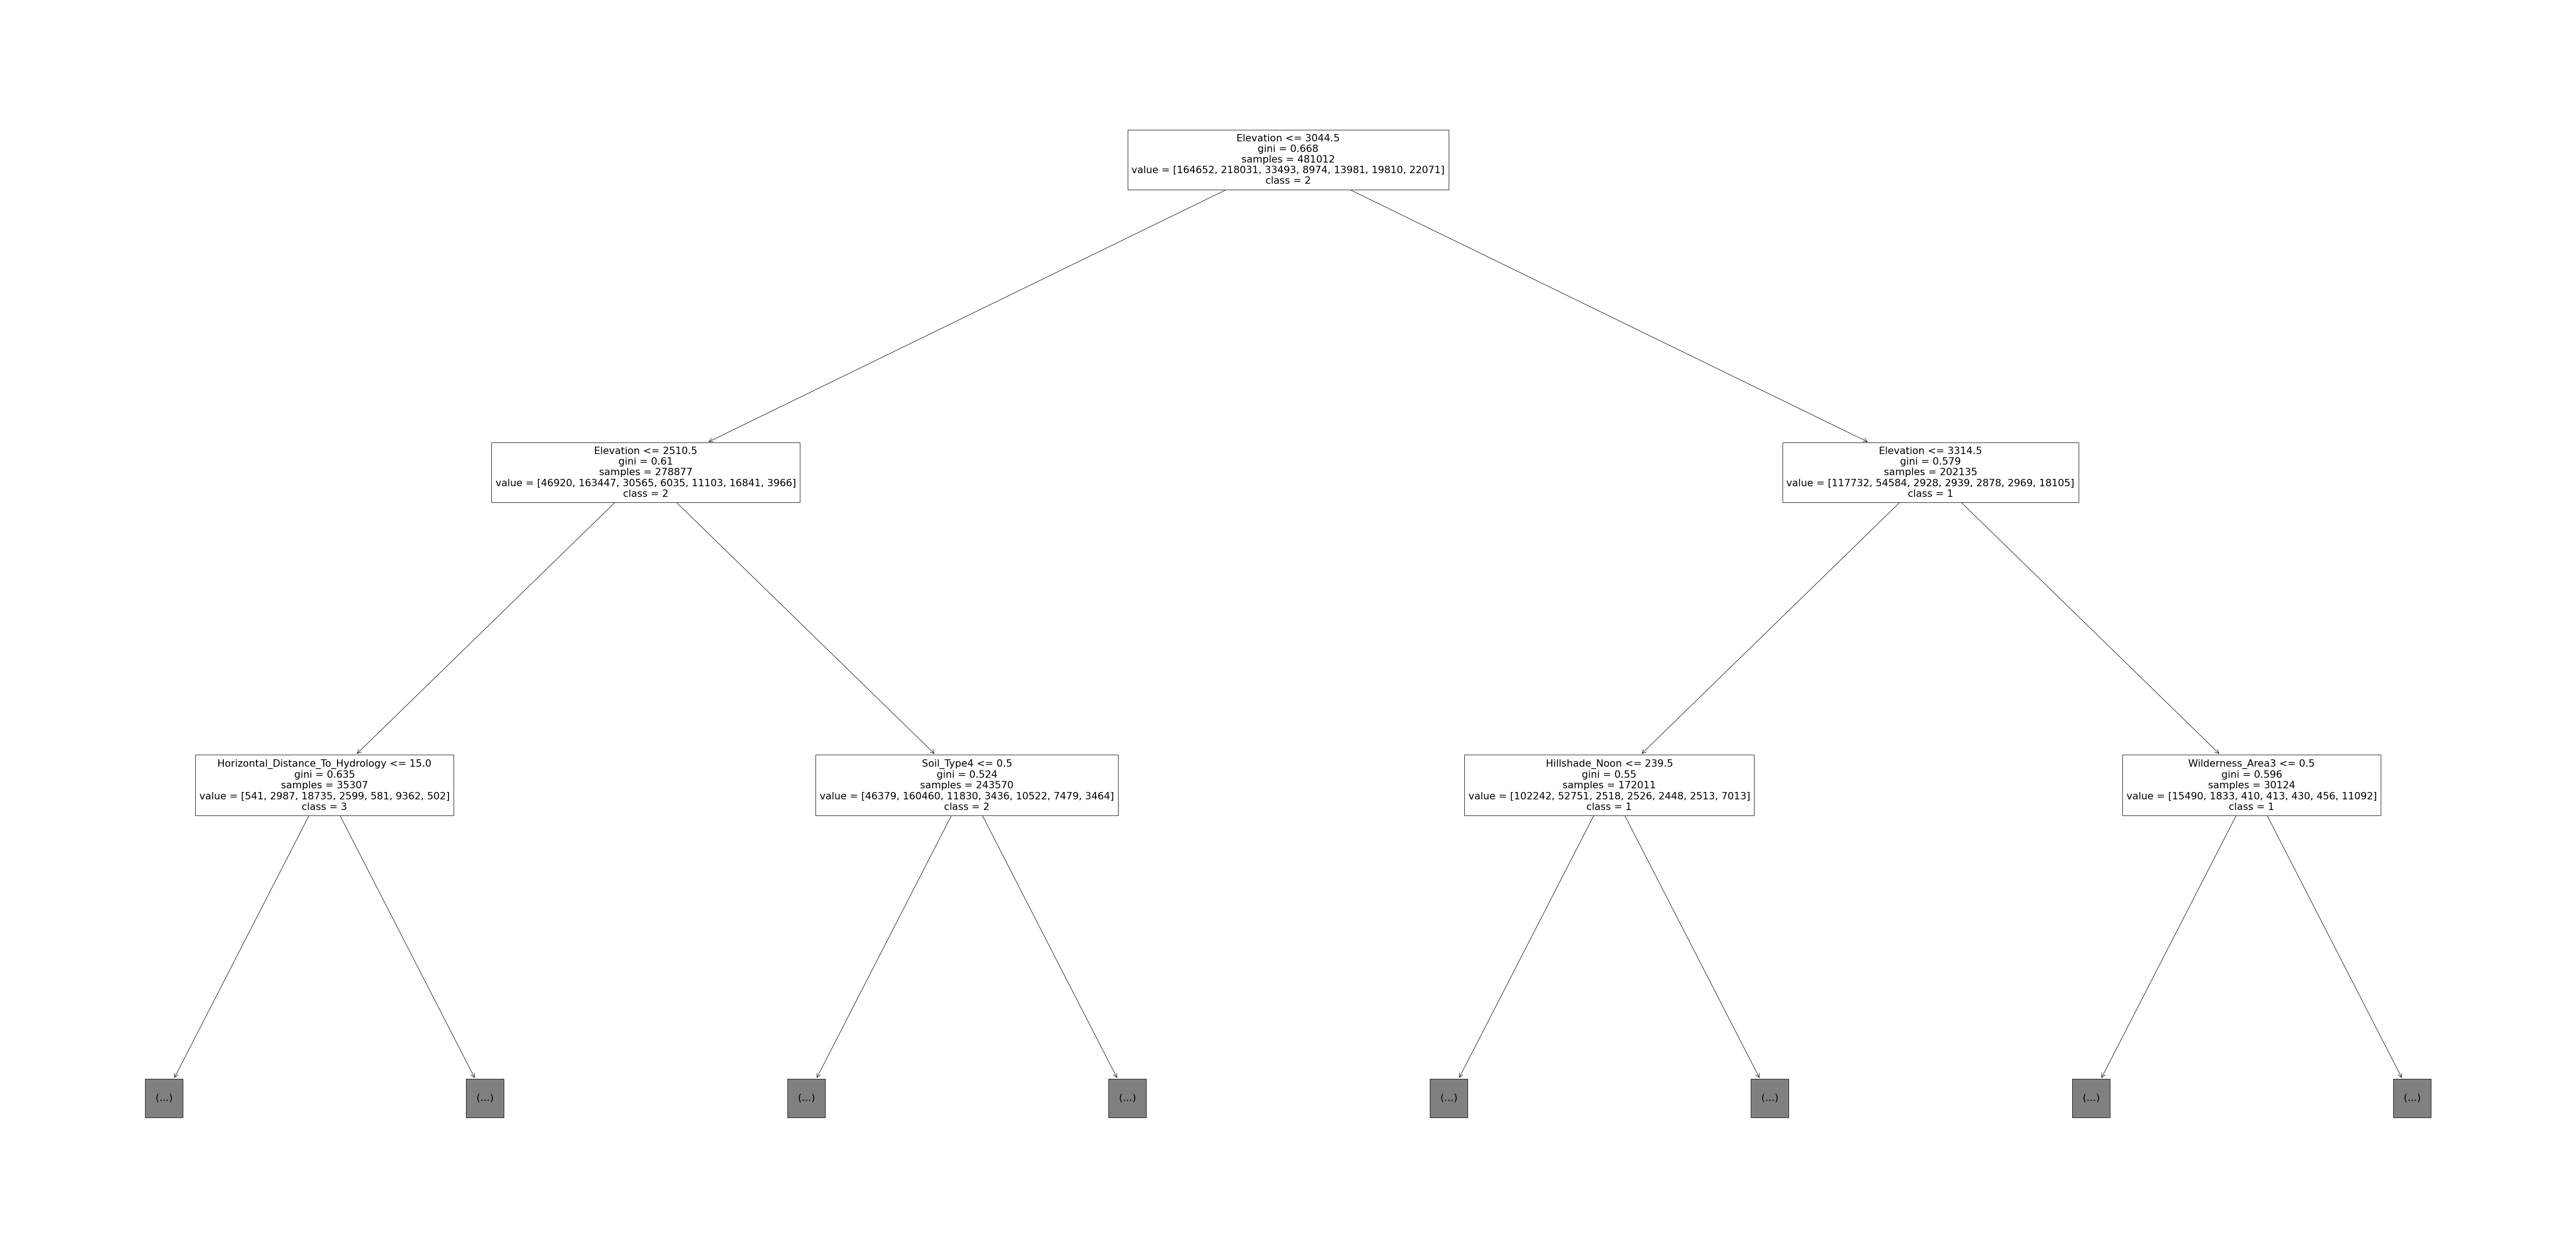

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(100, 50))
tree.plot_tree(my_tree,
max_depth=2,
class_names=covtype['class_names'],
feature_names=covtype['feature_names'])
plt.show()

## problem 2.3

The maximum depth of the learned decision tree my_tree is 63. 
There are 2 nodes at that depth.
Depth 22 has the most number of nodes in my_tree.

In [11]:
import numpy as np

node_depth = np.zeros(shape=my_tree.tree_.node_count, dtype=np.int64)
stack = [(0, 0)]

while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    if my_tree.tree_.children_left[node_id] != my_tree.tree_.children_right[node_id]:
        stack.append((my_tree.tree_.children_left[node_id], depth + 1))
        stack.append((my_tree.tree_.children_right[node_id], depth + 1))

In [23]:
# problem 2.3
# The maximum depth of the learned decision tree
print(max(node_depth))

63

In [24]:
# problem 2.3
# find the depth which has the most number of nodes
dic = [0 for row in range(64)]
for depth in node_depth:
    dic[depth] += 1
    
print(dic)
print(dic[22])
print(max(dic))

[1, 2, 4, 8, 16, 32, 64, 128, 244, 434, 752, 1182, 1810, 2600, 3502, 4426, 5412, 6558, 7624, 8372, 8972, 9184, 9438, 9414, 9284, 8754, 8470, 8010, 7282, 6712, 6094, 5384, 4766, 4230, 3724, 3200, 2778, 2364, 1900, 1630, 1386, 1178, 1002, 780, 626, 472, 348, 278, 240, 186, 164, 156, 106, 68, 38, 32, 22, 16, 20, 20, 12, 8, 4, 2]
9438
9438


## problem 2.4

The best value for the “maximum depth” hyperparameter is 20.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(covtype['train_data'],
covtype['train_labels'], test_size=0.2, random_state=0)

In [44]:
from sklearn.metrics import accuracy_score
scores = []
for depth in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    dtc = tree.DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_train, y_train)
    y_predict = dtc.predict(X_val)
    scores.append((depth,accuracy_score(y_predict,y_val)))
    
for depth,score in scores:
    print(f'{depth = :2d} : {score: 0.3f}')

depth =  5 :  0.650
depth = 10 :  0.716
depth = 15 :  0.772
depth = 20 :  0.801
depth = 25 :  0.800
depth = 30 :  0.786
depth = 35 :  0.777
depth = 40 :  0.772
depth = 45 :  0.770
depth = 50 :  0.769


In [64]:
np.array(scores)[:,0]

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

## problem 2.5

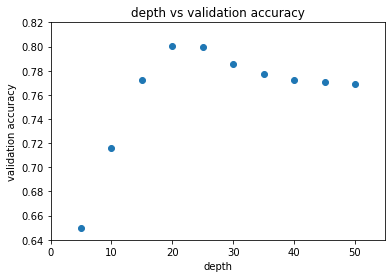

In [76]:
# problem 2.5
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x=np.array(scores)[:,0], y=np.array(scores)[:,1]);
ax.set_xlabel('depth')
ax.set_ylabel('validation accuracy')
ax.set_xlim([0,55])
ax.set_ylim([0.64,0.82])
ax.set_title('depth vs validation accuracy');

## problem 2.6

The test error of this new learned decision tree is 1 - 0.81 = 0.19.

In [78]:
# problem 2.6
my_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
my_tree.fit(covtype['train_data'], covtype['train_labels'])
print('Performance on training data')
print(classification_report(covtype['train_labels'],
    my_tree.predict(covtype['train_data']),
    target_names=covtype['class_names']))

print('Performance on test data')

print(classification_report(covtype['test_labels'],
    my_tree.predict(covtype['test_data']),
    target_names=covtype['class_names']))

Performance on training data
              precision    recall  f1-score   support

           1       0.90      0.90      0.90    164652
           2       0.86      0.96      0.91    218031
           3       0.91      0.80      0.85     33493
           4       0.95      0.40      0.56      8974
           5       0.91      0.45      0.60     13981
           6       0.86      0.64      0.73     19810
           7       0.96      0.75      0.84     22071

    accuracy                           0.88    481012
   macro avg       0.91      0.70      0.77    481012
weighted avg       0.88      0.88      0.88    481012

Performance on test data
              precision    recall  f1-score   support

           1       0.84      0.83      0.83     34044
           2       0.81      0.91      0.86     45223
           3       0.78      0.69      0.73      7023
           4       0.38      0.17      0.24      1867
           5       0.56      0.29      0.38      2935
           6       0.66 

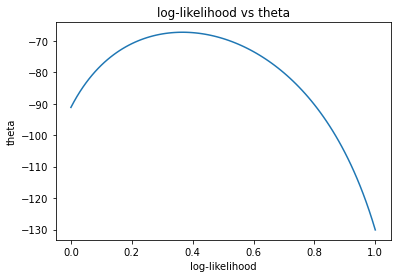

In [3]:
# problem 4-2
import math
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(6,4))
x = [i for i in np.arange(0, 1.01, 0.01)]
y = [40*math.log(0.75*j+0.125)+60*math.log(-0.75*j+0.875) for j in x]
plt.plot(x,y)
ax.set_xlabel('log-likelihood')
ax.set_ylabel('theta')
ax.set_title('log-likelihood vs theta');

In [8]:
best_y = max(y)
for i in range(len(y)):
    if y[i] == best_y:
        print(x[i])
        break

0.37
